In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME)
    curr_image_dir = os.path.join(const.dir.images_hp_v2(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v2(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v2(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/525 [00:00<?, ?it/s]

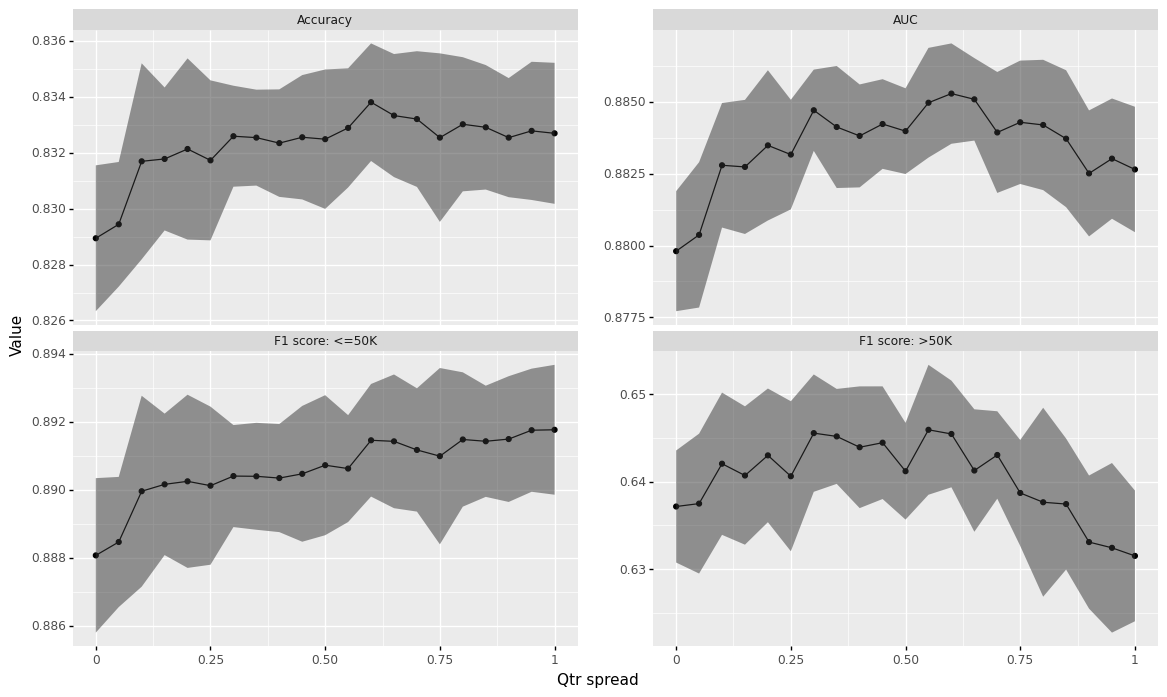

In [116]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [ ]:
result_qtr_spread

  0%|          | 0/400 [00:00<?, ?it/s]

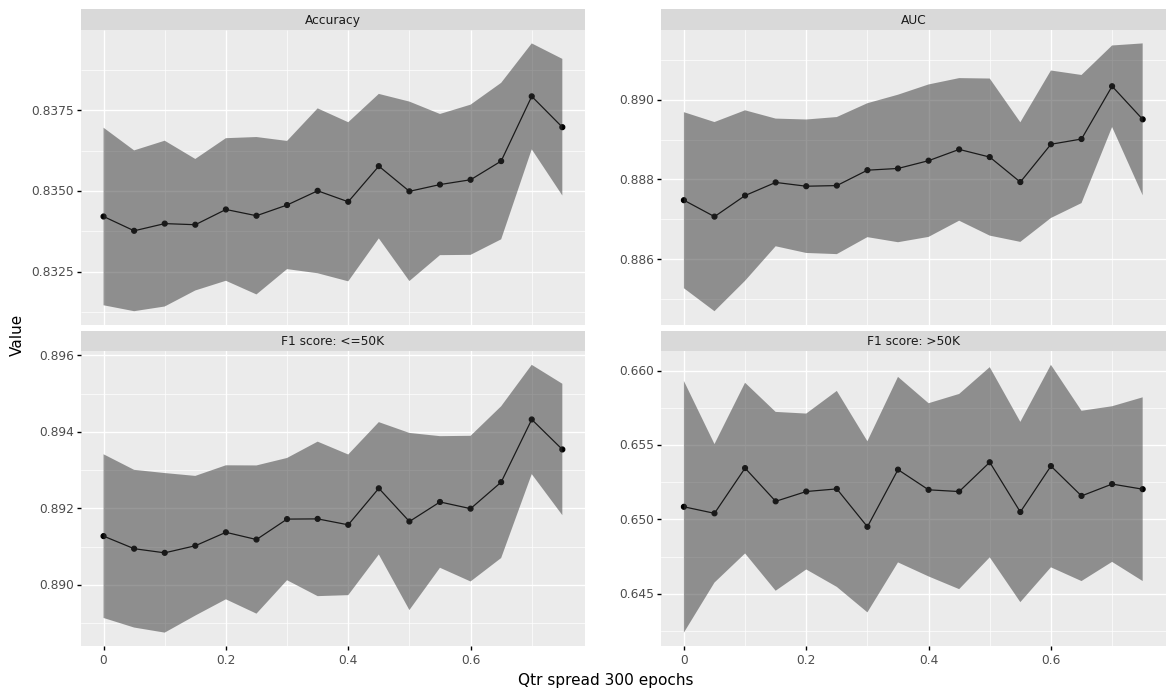

In [154]:
result_qtr_spread_300_epochs = plot_hp_tuning("qtr_spread_300_epochs")

In [155]:
result_qtr_spread_300_epochs 

,Qtr spread 300 epochs,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.834210,0.887479,0.771060,0.891275,0.650845,0.002754,0.002208,0.004472,0.002141,0.008461
1,0.05,0.833766,0.887068,0.770676,0.890945,0.650406,0.002494,0.002372,0.002631,0.002063,0.004657
2,0.10,0.833989,0.887596,0.772142,0.890837,0.653448,0.002571,0.002138,0.003162,0.002087,0.005740
3,0.15,0.833955,0.887925,0.771118,0.891023,0.651213,0.002040,0.001601,0.002886,0.001827,0.006014
4,0.20,0.834428,0.887830,0.771623,0.891374,0.651873,0.002211,0.001674,0.002898,0.001753,0.005241
5,0.25,0.834234,0.887846,0.771617,0.891185,0.652049,0.002441,0.001719,0.003534,0.001939,0.006590
6,0.30,0.834566,0.888233,0.770610,0.891720,0.649500,0.001988,0.001680,0.003006,0.001599,0.005754
7,0.35,0.835007,0.888276,0.772534,0.891725,0.653344,0.002557,0.001850,0.003432,0.002021,0.006238
8,0.40,0.834667,0.888471,0.771778,0.891570,0.651987,0.002467,0.001912,0.003373,0.001840,0.005824
9,0.45,0.835772,0.888754,0.772198,0.892525,0.651870,0.002241,0.001788,0.003514,0.001731,0.006563


  0%|          | 0/630 [00:00<?, ?it/s]

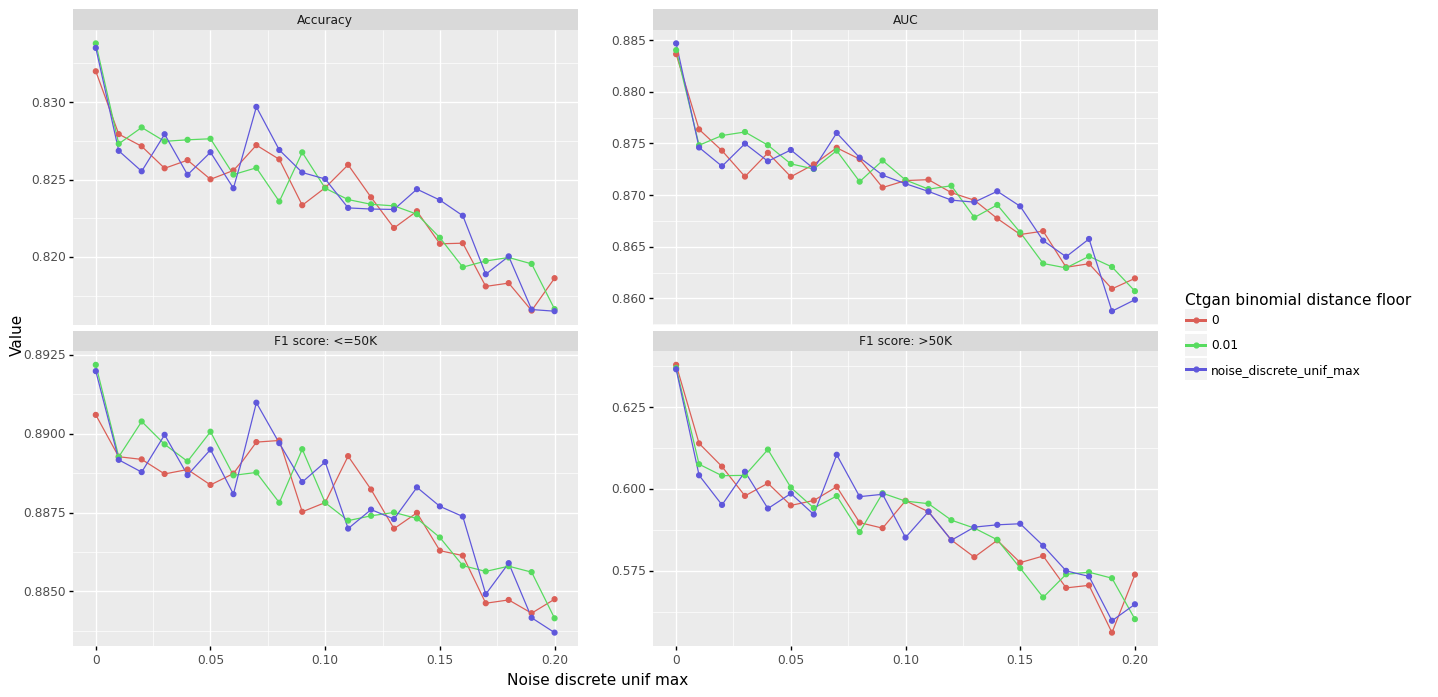

In [142]:
result_noise_ctgan = plot_hp_tuning("noise_ctgan")

In [119]:
result_noise_ctgan

,Noise discrete unif max,Ctgan binomial distance floor,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0,0.831992,0.883653,0.764251,0.890602,0.637900,0.002633,0.001999,0.001713,0.002343,0.003658
1,0.00,0.01,0.833792,0.884040,0.764571,0.892191,0.636950,0.001558,0.001234,0.005180,0.001378,0.010864
2,0.00,noise_discrete_unif_max,0.833499,0.884692,0.764271,0.891991,0.636550,0.001854,0.001959,0.003643,0.001670,0.007748
3,0.01,0,0.827935,0.876364,0.751607,0.889274,0.613940,0.001816,0.003052,0.005351,0.001329,0.010765
4,0.01,0.01,0.827311,0.874831,0.748426,0.889270,0.607582,0.002269,0.002298,0.006483,0.001444,0.012696
...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.19,0.01,0.819562,0.863048,0.729219,0.885610,0.572827,0.001904,0.001992,0.003304,0.001612,0.006917
59,0.19,noise_discrete_unif_max,0.816614,0.858762,0.722008,0.884161,0.559854,0.004015,0.005938,0.007807,0.002546,0.014013
60,0.20,0,0.818639,0.861940,0.729337,0.884751,0.573922,0.003853,0.004234,0.011257,0.002100,0.021525
61,0.20,0.01,0.816640,0.860701,0.722239,0.884145,0.560332,0.003383,0.004481,0.005172,0.002554,0.009760


  0%|          | 0/290 [00:00<?, ?it/s]

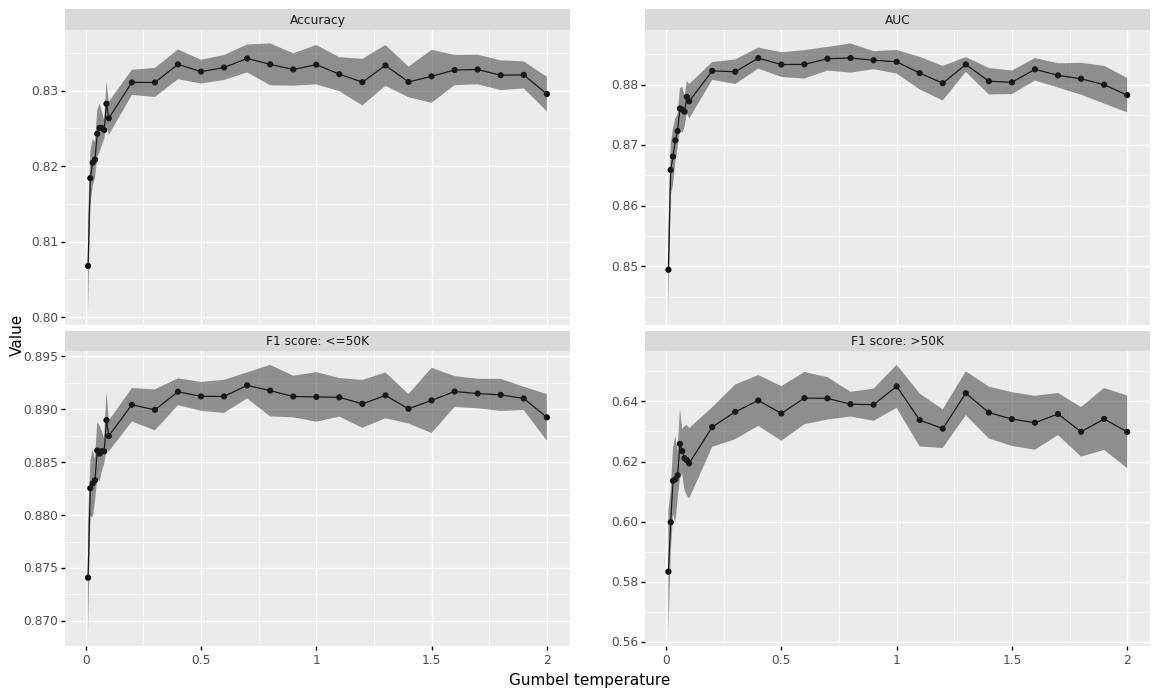

In [152]:
result_gumbel_temperature = plot_hp_tuning("gumbel_temperature")

In [153]:
result_gumbel_temperature

,Gumbel temperature,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.01,0.806786,0.849424,0.728738,0.874086,0.583390,0.005986,0.006841,0.009922,0.005190,0.020260
1,0.02,0.818420,0.865902,0.741183,0.882543,0.599822,0.003483,0.004199,0.005581,0.002573,0.010334
2,0.03,0.820465,0.868121,0.748296,0.882996,0.613595,0.003136,0.004705,0.004471,0.003228,0.010885
3,0.04,0.820863,0.870794,0.748699,0.883301,0.614098,0.002334,0.003596,0.006918,0.002030,0.014409
4,0.05,0.824303,0.872334,0.750788,0.886110,0.615467,0.003120,0.002778,0.003981,0.002656,0.007982
5,0.06,0.825080,0.876058,0.755843,0.885814,0.625871,0.003247,0.003312,0.005871,0.002658,0.011632
6,0.07,0.825060,0.875827,0.754753,0.886042,0.623464,0.002237,0.003846,0.003673,0.001867,0.007339
7,0.08,0.824807,0.875522,0.753570,0.886029,0.621112,0.001205,0.002550,0.005028,0.001210,0.010713
8,0.09,0.828267,0.877968,0.754714,0.888974,0.620453,0.003002,0.002640,0.005483,0.002742,0.011713
9,0.10,0.826341,0.877223,0.753432,0.887481,0.619384,0.002205,0.002856,0.005954,0.001462,0.011699


  0%|          | 0/75 [00:00<?, ?it/s]

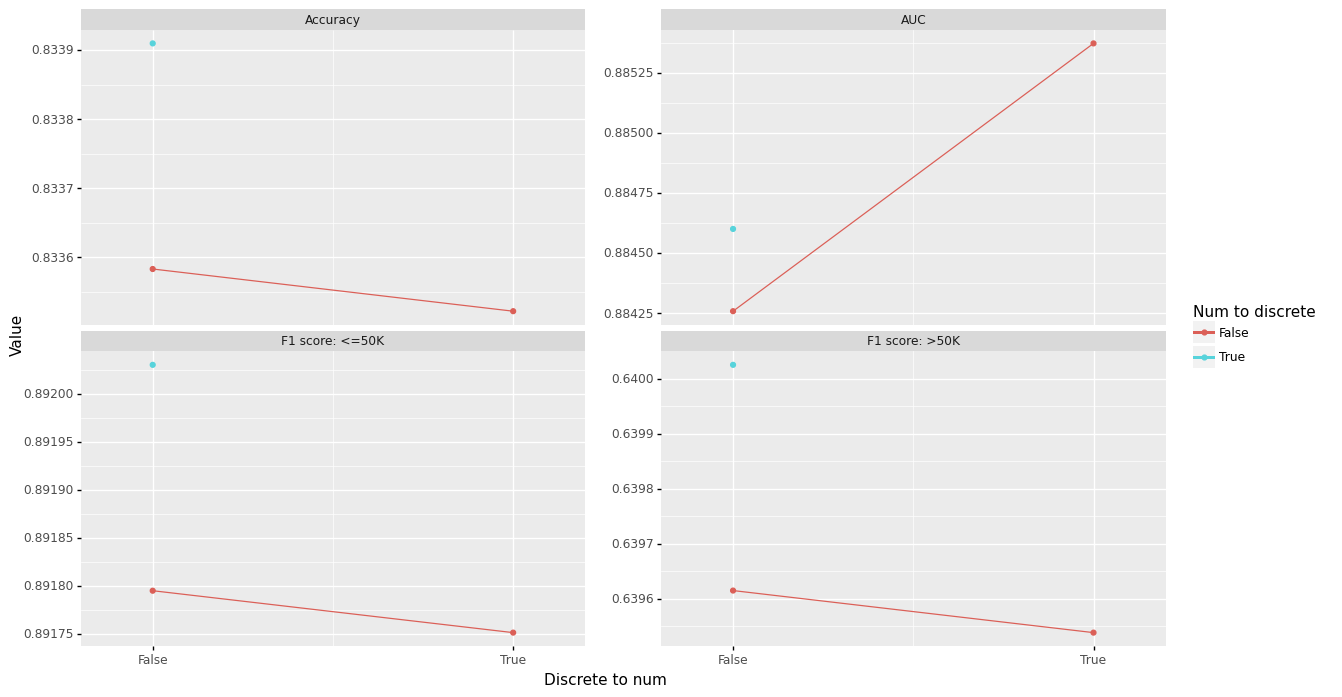

In [122]:
result_add_connection = plot_hp_tuning("add_connection")

In [123]:
result_add_connection

,Discrete to num,Num to discrete,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,False,0.833583,0.884258,0.765705,0.891795,0.639615,0.002679,0.002196,0.004251,0.002038,0.007925
1,0,True,0.833910,0.884600,0.766028,0.892030,0.640025,0.002710,0.002426,0.003934,0.002188,0.007588
2,1,False,0.833522,0.885372,0.765645,0.891751,0.639538,0.002367,0.001426,0.003576,0.001902,0.006854


In [ ]:
result_oh_encoding_choices = plot_hp_tuning("oh_encoding_choices")

  0%|          | 0/1010 [00:00<?, ?it/s]

In [144]:
result_oh_encoding_choices

,Noise discrete unif max,Gumbel temp,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.1,0.828426,0.878760,0.759590,0.888202,0.630978,0.002252,0.002770,0.004594,0.001865,0.009371
1,0.00,0.2,0.831275,0.881692,0.761627,0.890447,0.632807,0.001369,0.002276,0.003479,0.001504,0.007879
2,0.00,0.3,0.832284,0.883167,0.761860,0.891350,0.632370,0.002368,0.002349,0.004185,0.001646,0.007638
3,0.00,0.4,0.831594,0.883802,0.763168,0.890453,0.635882,0.002302,0.001387,0.003210,0.001858,0.006104
4,0.00,0.5,0.832656,0.882862,0.765312,0.890993,0.639630,0.002881,0.001603,0.003430,0.002594,0.007292
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.13,0.4,0.821740,0.867963,0.735736,0.886429,0.585043,0.003535,0.003696,0.010422,0.002233,0.020349
95,0.13,0.5,0.823831,0.869753,0.739407,0.887721,0.591093,0.002705,0.003350,0.003831,0.002007,0.006884
96,0.13,0.7,0.825186,0.871180,0.740403,0.888717,0.592089,0.001776,0.003879,0.006694,0.001407,0.013811
97,0.13,1.0,0.827052,0.873551,0.743270,0.889870,0.596670,0.003899,0.002701,0.012237,0.001774,0.023301


  0%|          | 0/200 [00:00<?, ?it/s]

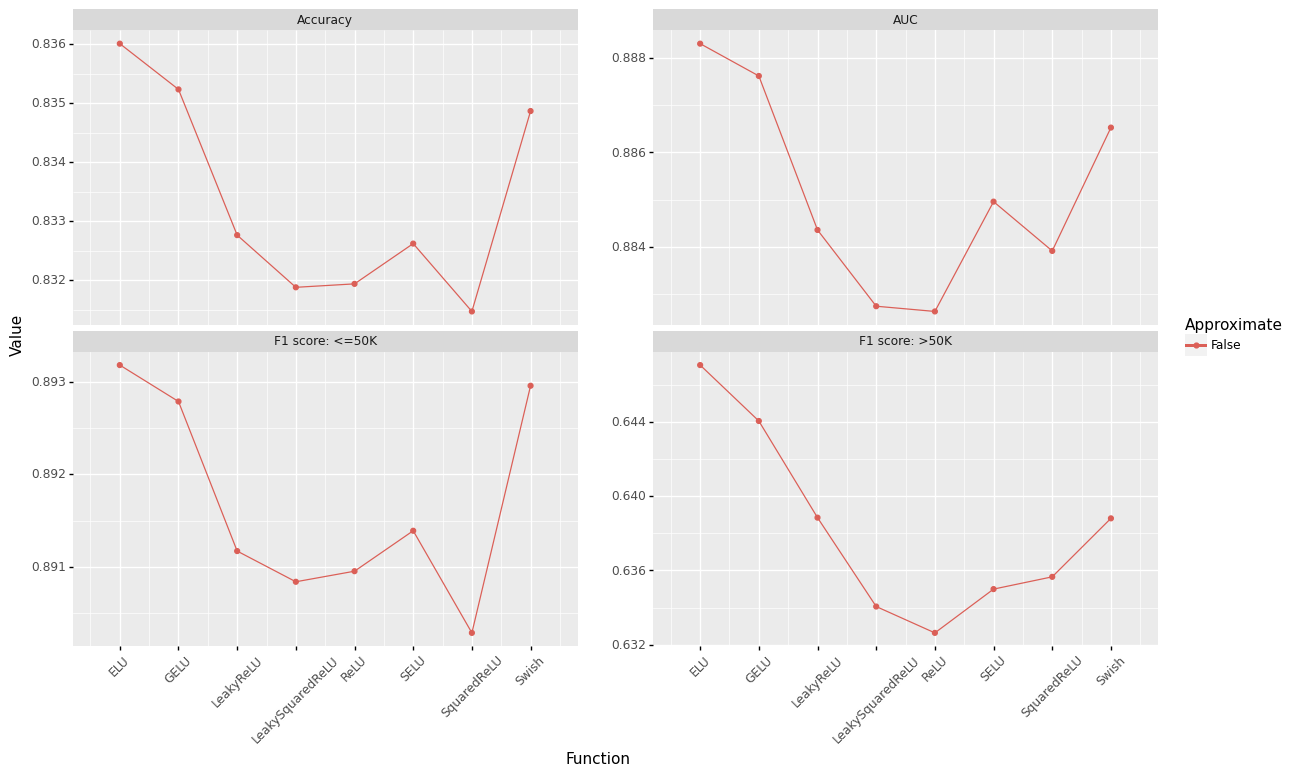

In [138]:
result_activation_function = plot_hp_tuning("activation_function", x_tick_angle=45)

In [139]:
result_activation_function

,Function,Approximate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,ELU,False,0.836011,0.888301,0.770122,0.893181,0.647062,0.001936,0.001612,0.003306,0.001461,0.006231
1,GELU,False,0.835235,0.887617,0.768419,0.892787,0.644051,0.002599,0.001667,0.003098,0.002238,0.006167
2,LeakyReLU,False,0.832765,0.884359,0.765007,0.891170,0.638844,0.002521,0.002428,0.004527,0.001897,0.008637
3,LeakySquaredReLU,False,0.831880,0.882745,0.762447,0.890838,0.634056,0.002787,0.002845,0.006962,0.001869,0.013489
4,ReLU,False,0.831939,0.882634,0.761795,0.890953,0.632637,0.002400,0.002975,0.009678,0.002072,0.020064
5,SELU,False,0.832622,0.884958,0.763192,0.891390,0.634995,0.003364,0.002463,0.006231,0.002339,0.011494
6,SquaredReLU,False,0.831471,0.883915,0.762971,0.890286,0.635656,0.003427,0.002301,0.007921,0.003204,0.016825
7,Swish,False,0.834869,0.886525,0.765882,0.892958,0.638806,0.002602,0.001996,0.004053,0.001845,0.007149


  0%|          | 0/100 [00:00<?, ?it/s]

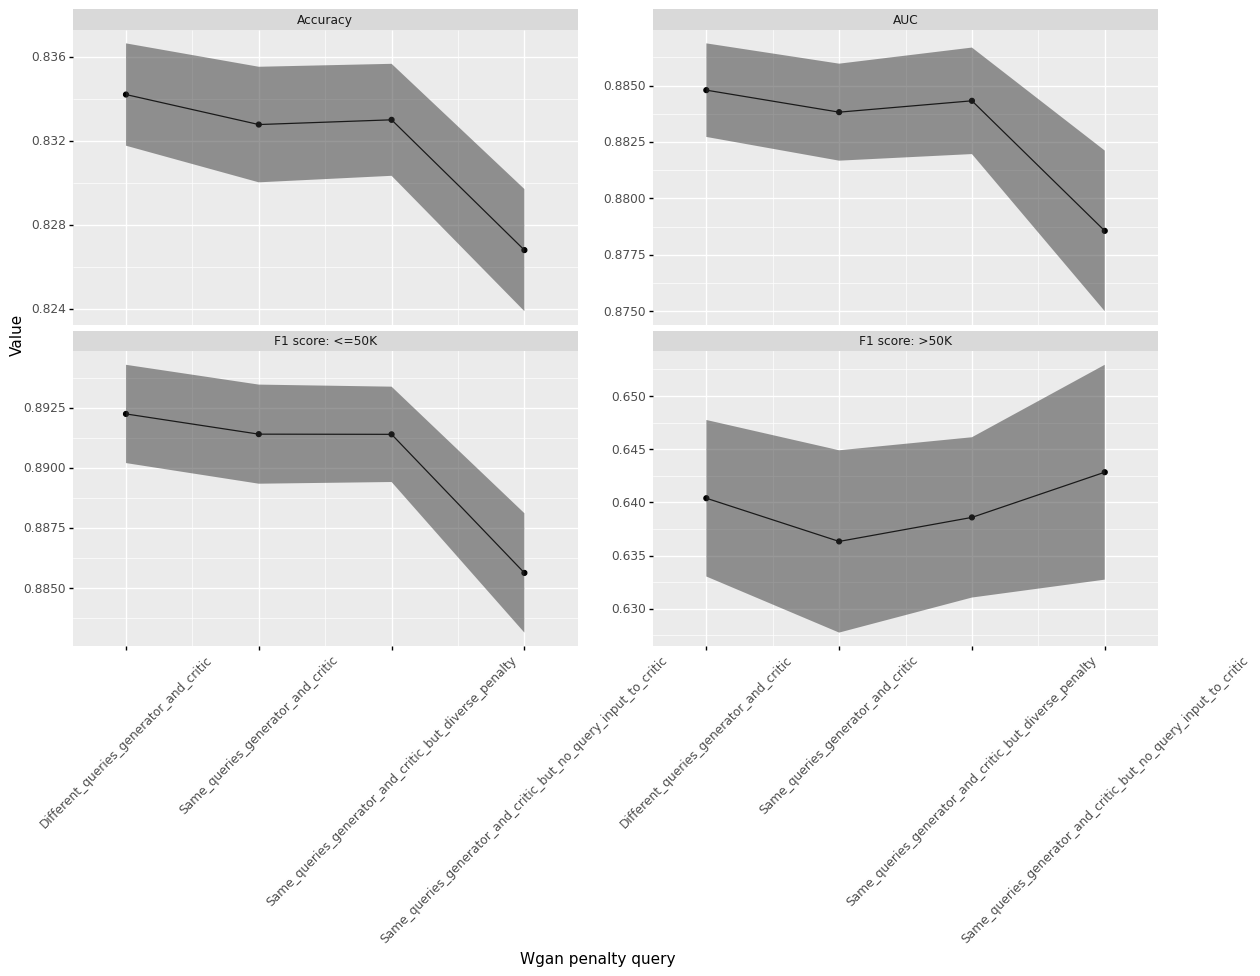

In [6]:
result_wgan_penalty_query = plot_hp_tuning("wgan_penalty_query", x_tick_angle=45)

In [18]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as t:
  x_sq = x * x
  with t.stop_recording():
    y = x + 1
  z = x_sq * y

grad = t.gradient(z, {'x': x, 'y': y})

print('dz/dx:', grad['x'])  # 2*x => 4
print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(12.0, shape=(), dtype=float32)
dz/dy: None


In [158]:
result_wgan_penalty_query

,Wgan penalty query,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,Different_queries_generator_and_critic,0.834212,0.884795,0.766326,0.892252,0.640400,0.002441,0.002074,0.003704,0.002046,0.007357
1,Same_queries_generator_and_critic,0.832781,0.883819,0.763875,0.891410,0.636339,0.002757,0.002150,0.004585,0.002063,0.008568
2,Same_queries_generator_and_critic_but_diverse_...,0.833007,0.884322,0.765000,0.891402,0.638598,0.002671,0.002361,0.004137,0.001985,0.007534
